In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
model = tf.keras.models.load_model('fruition_model.h5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                3

In [7]:
def inference_model(path):
  img = path
  img = image.load_img(img, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.
  
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions)

  classes = ['Apple Fresh', 'Apple Rotten', 'Apple Semifresh', 'Apple Semirotten',
               'Banana Fresh', 'Banana Rotten', 'Banana Semifresh', 'Banana Semirotten',
               'Orange Fresh', 'Orange Rotten', 'Orange Semifresh', 'Orange Semirotten']
  print(f"Predicted class: {classes[predicted_class]}")

  accuracy = predictions[0][predicted_class] * 100.0
  print(f"Prediction accuracy: {accuracy:.2f}%")

  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 35ms/step
Predicted class: Orange Rotten
Prediction accuracy: 95.97%


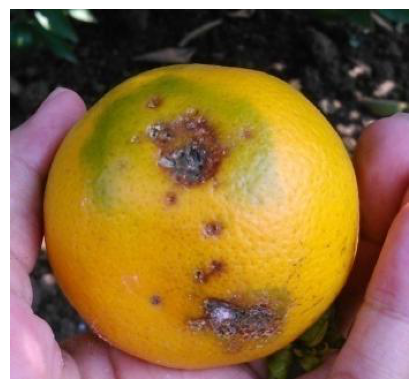

In [36]:
inference_model('test/26.jpg')